In [76]:
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
# Load the dataset
file_path = 'California_Fire_Incidents.csv'  
fire_data = pd.read_csv(file_path)
fire_data

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,9.0,False,CAL FIRE / Riverside County Fire,NaN,2019,True,/incidents/2019/10/10/eagle-fire/,NaN,NaN,Riverside,...,NaN,2019-10-10T12:08:00Z,Finalized,NaN,NaN,NaN,NaN,6e93b252-99a3-4214-9921-238373b17535,2019-10-10T18:11:59.733Z,NaN
1632,2.0,False,CAL FIRE Nevada-Yuba-Placer Unit,NaN,2019,True,/incidents/2019/6/28/long-fire/,NaN,NaN,Nevada,...,NaN,2019-06-28T15:03:04Z,Finalized,NaN,NaN,NaN,NaN,b38c0563-b321-431b-9174-6336c5a0d449,2019-06-30T15:52:01.023Z,NaN
1633,NaN,False,Yolo County Fire Protection District,NaN,2019,False,/incidents/2019/11/25/cashe-fire/,NaN,NaN,Yolo,...,NaN,2019-11-25T12:02:02Z,Finalized,NaN,NaN,NaN,NaN,9c26f915-1b33-422d-b30a-9eb4da6fd729,2019-12-03T16:35:20.93Z,NaN
1634,NaN,False,Camp Pendleton Marine Corps Base,NaN,2019,False,/incidents/2019/10/22/oak-fire/,NaN,NaN,San Diego,...,NaN,2019-10-22T19:20:44Z,Finalized,NaN,NaN,NaN,NaN,7264a106-e0f4-41de-8fd0-3f9110431e28,2019-11-21T12:21:28.58Z,NaN


In [78]:
# Convert the 'Started' column to datetime format and extract the hour and month
fire_data['Started'] = pd.to_datetime(fire_data['Started'])
fire_data['StartHour'] = fire_data['Started'].dt.hour
fire_data['StartMonth'] = fire_data['Started'].dt.month

# Count the occurrences of fires in each county to find the locations most frequently under fire threat
fire_counts_by_county = fire_data['Counties'].value_counts()

# Analyze the distribution of fire occurrences by hour of the day and month of the year
hourly_distribution = fire_data['StartHour'].value_counts().sort_index()
monthly_distribution = fire_data['StartMonth'].value_counts().sort_index()

# Group data by 'ArchiveYear' to analyze annual frequency and devastation metrics
annual_data = fire_data.groupby('ArchiveYear').agg({
    'AcresBurned': 'sum',
    'StructuresDestroyed': 'sum',
    'Fatalities': 'sum',
    'UniqueId': 'count'
}).rename(columns={'UniqueId': 'FireCount'})#

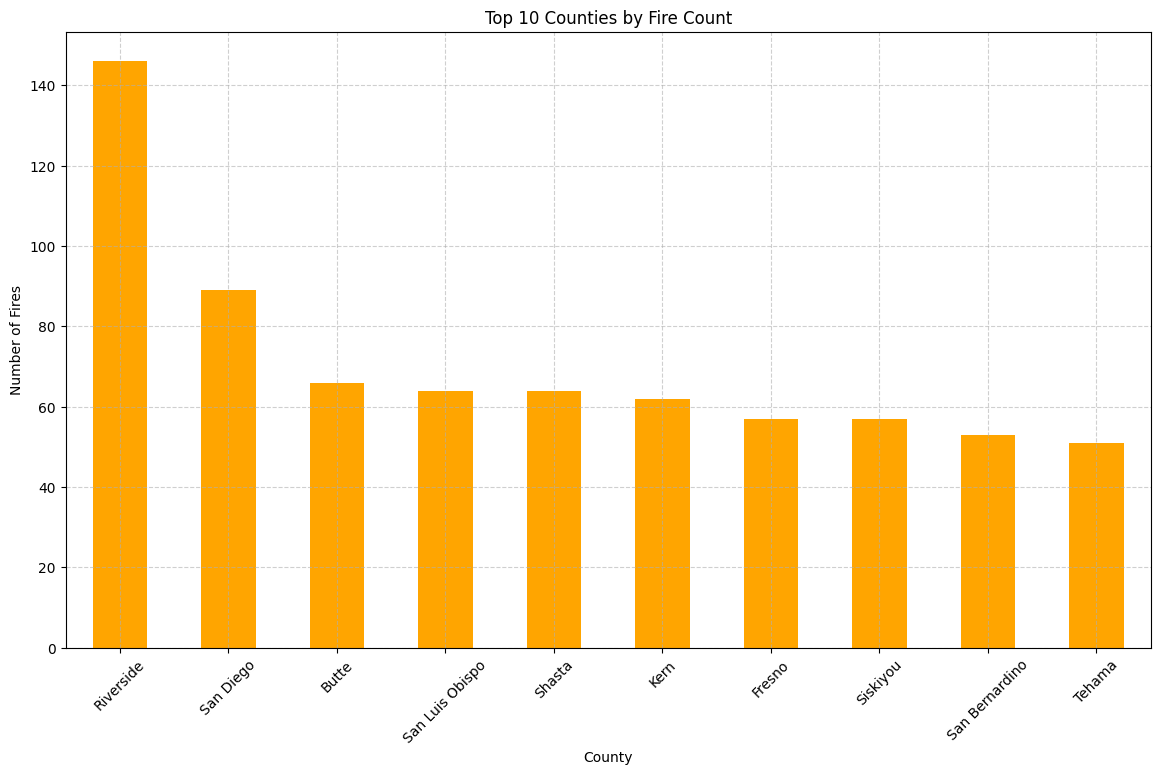

In [79]:
# Bar Graph of Fire Counts by County
plt.figure(figsize=(14, 8))
fire_counts_by_county.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Counties by Fire Count')
plt.xlabel('County')
plt.ylabel('Number of Fires')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


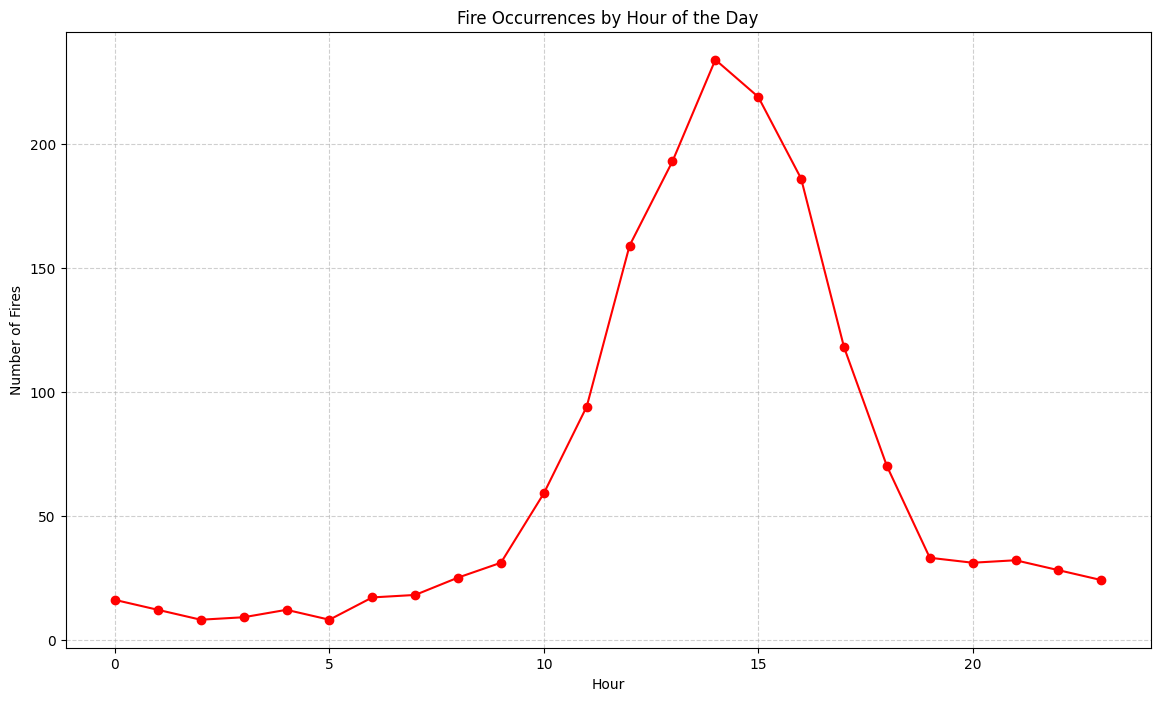

In [80]:
# Line Graph of Fire Occurrences by Hour
plt.figure(figsize=(14, 8))
hourly_distribution.plot(kind='line', marker='o', color='red')
plt.title('Fire Occurrences by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Fires')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


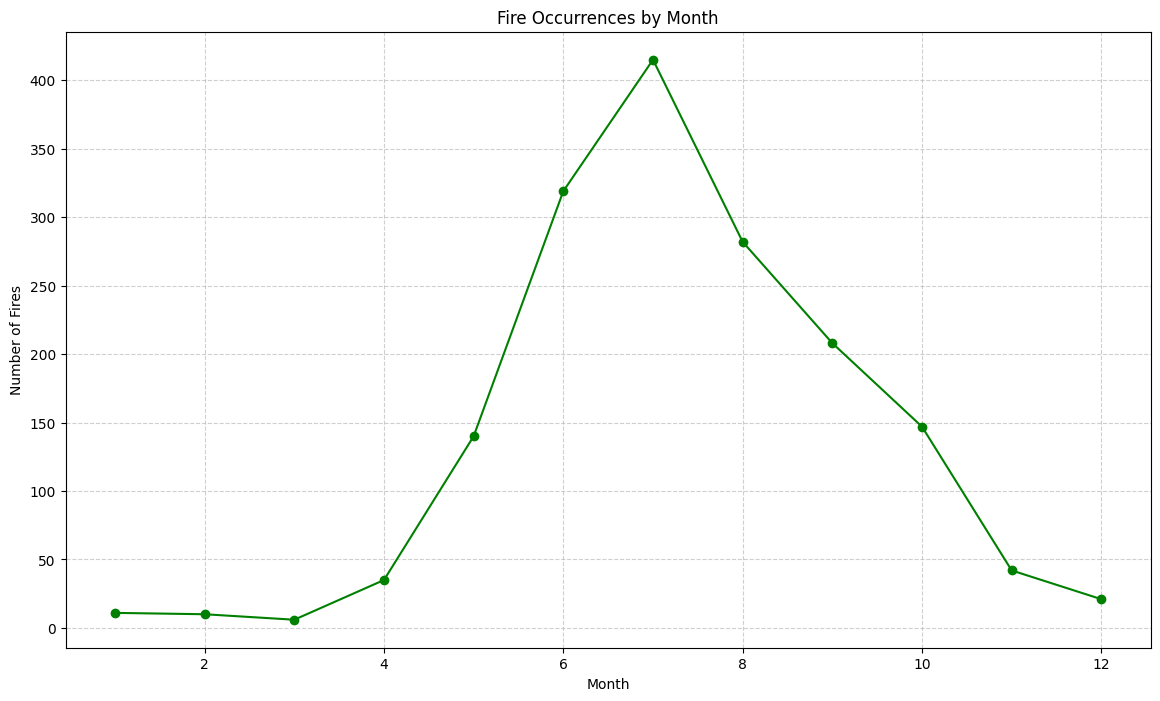

In [81]:
# Line Graph of Fire Occurrences by Month
plt.figure(figsize=(14, 8))
monthly_distribution.plot(kind='line', marker='o', color='green')
plt.title('Fire Occurrences by Month')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()




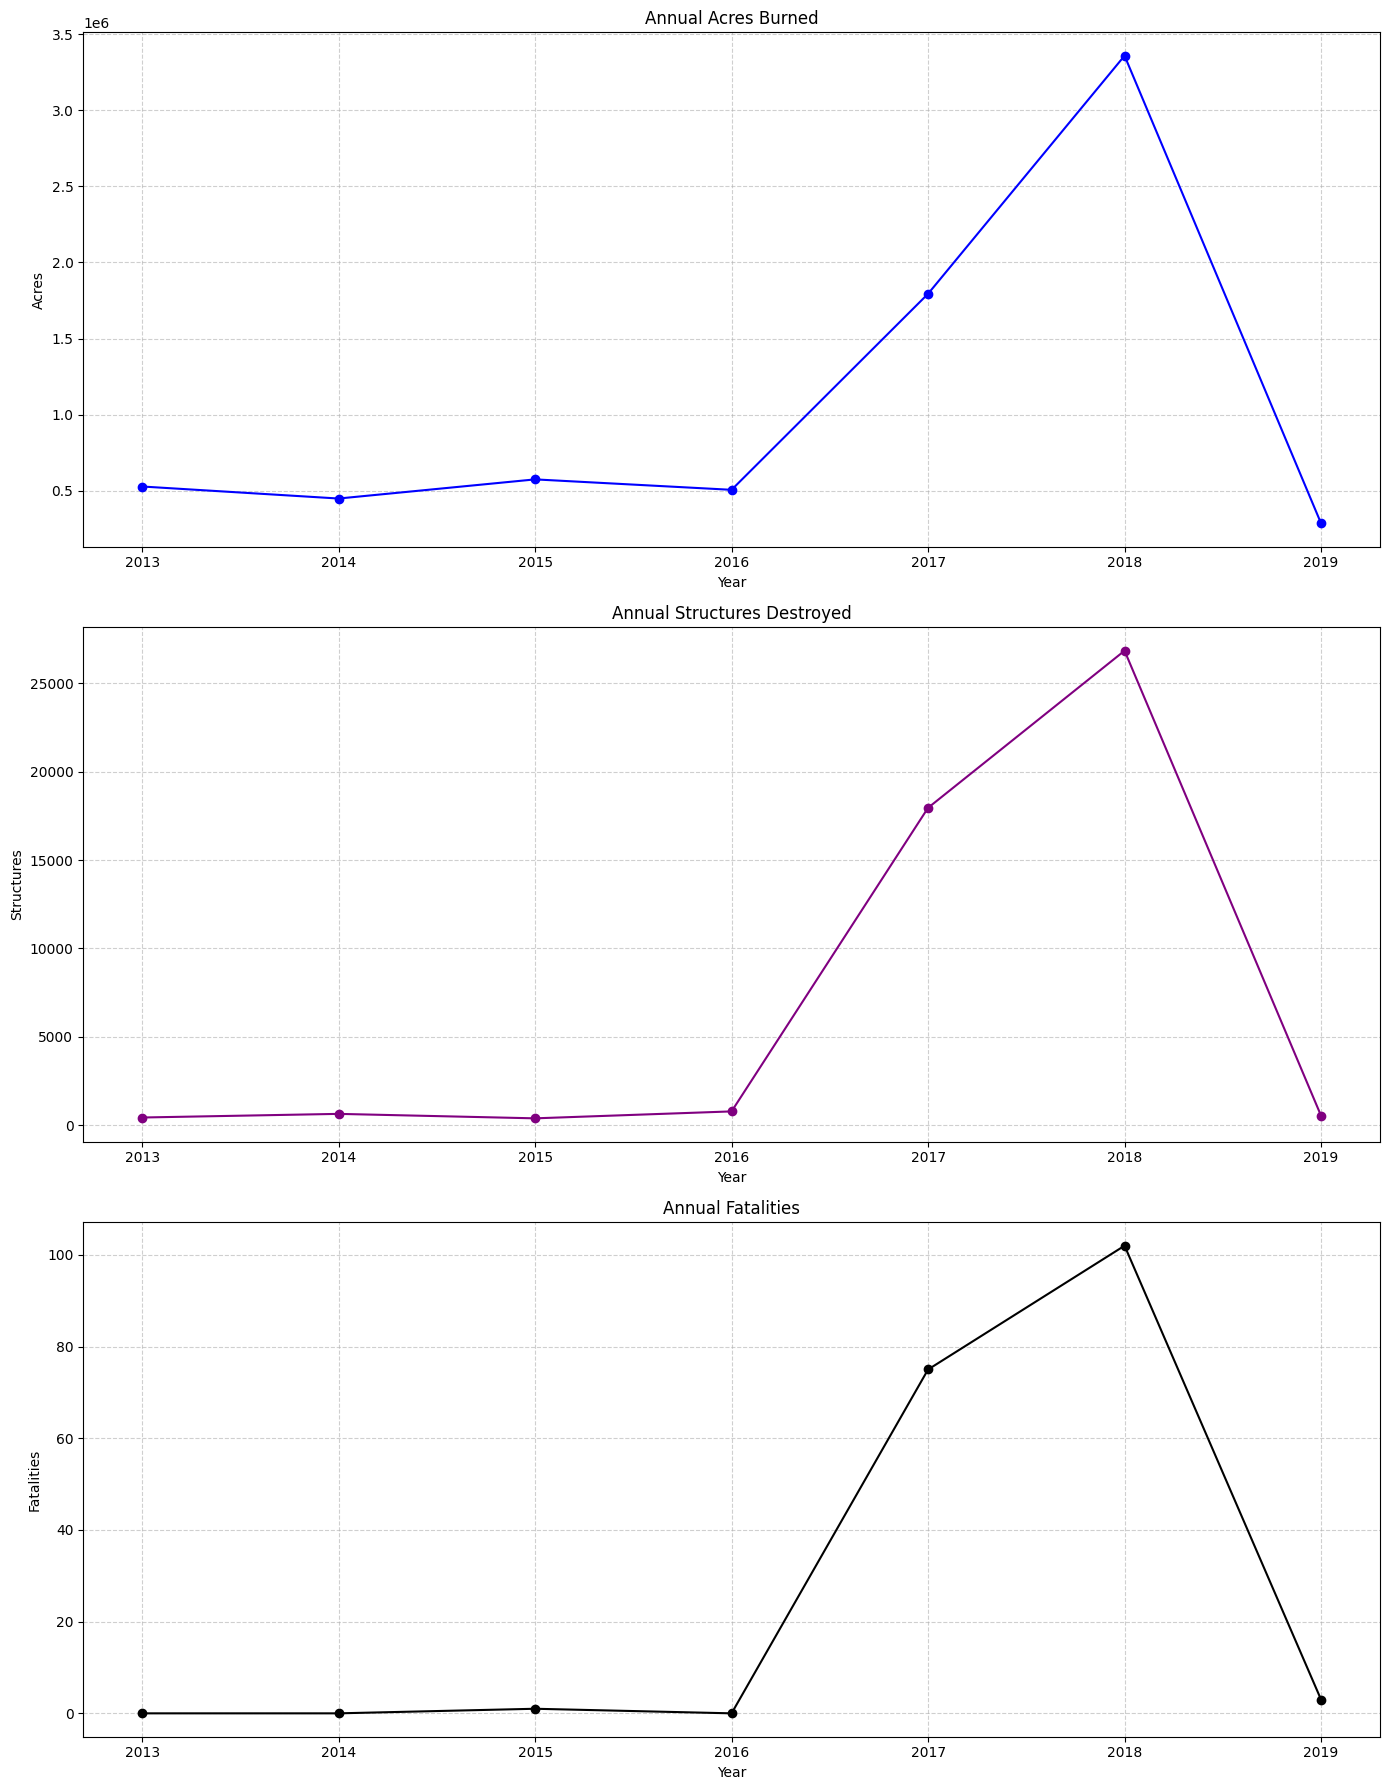

In [82]:

# Time Series of Annual Wildfire Devastation
fig, ax = plt.subplots(3, 1, figsize=(14, 18))
annual_data['AcresBurned'].plot(ax=ax[0], kind='line', marker='o', color='blue')
ax[0].set_title('Annual Acres Burned')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Acres')
ax[0].grid(True, linestyle='--', alpha=0.6)

annual_data['StructuresDestroyed'].plot(ax=ax[1], kind='line', marker='o', color='purple')
ax[1].set_title('Annual Structures Destroyed')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Structures')
ax[1].grid(True, linestyle='--', alpha=0.6)

annual_data['Fatalities'].plot(ax=ax[2], kind='line', marker='o', color='black')
ax[2].set_title('Annual Fatalities')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Fatalities')
ax[2].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

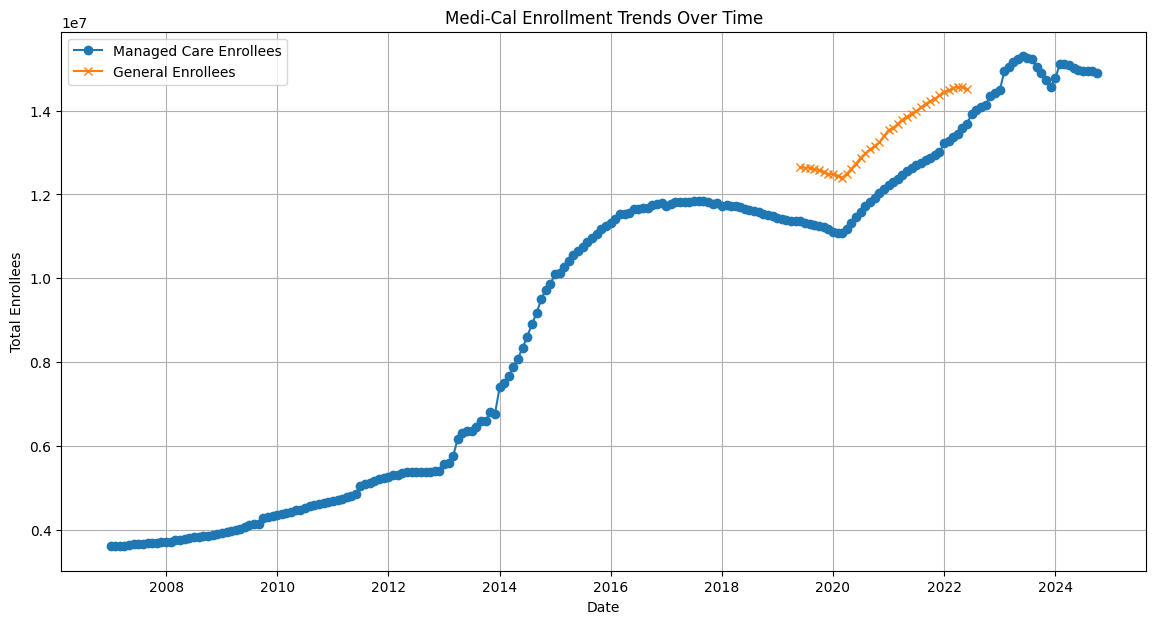

In [88]:
# Load datasets
path1 = 'care_enrollment.csv'
path2 = 'enrollment_data.csv'

managed_care = pd.read_csv(path1)
enrollment = pd.read_csv(path2)

# Convert 'Enrollment Month' in managed_care to datetime
managed_care['Enrollment Month'] = pd.to_datetime(managed_care['Enrollment Month'])

# Convert 'Count of Enrollees' to numeric (remove commas and handle as numeric)
managed_care['Count of Enrollees'] = pd.to_numeric(
    managed_care['Count of Enrollees'].str.replace(',', ''), errors='coerce'
)

# Convert 'Eligibility Date' in enrollment to datetime
enrollment['Eligibility Date'] = pd.to_datetime(enrollment['Eligibility Date'])

# Replace 'NULL' with 0 in '# Enrolled' and convert to numeric
enrollment['# Enrolled'] = pd.to_numeric(enrollment['# Enrolled'].fillna(0))

# Group and sum enrollment counts by month
enrollment_trends_managed = managed_care.groupby(managed_care['Enrollment Month'].dt.to_period('M'))['Count of Enrollees'].sum()
enrollment_trends_general = enrollment.groupby(enrollment['Eligibility Date'].dt.to_period('M'))['# Enrolled'].sum()
enrollment_trends_managed.to_csv('enrollment_trends_managed.csv')
# Convert period indices to datetime for plotting
enrollment_trends_managed.index = enrollment_trends_managed.index.to_timestamp()
enrollment_trends_general.index = enrollment_trends_general.index.to_timestamp()

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(enrollment_trends_managed.index, enrollment_trends_managed.values, label='Managed Care Enrollees', marker='o')
plt.plot(enrollment_trends_general.index, enrollment_trends_general.values, label='General Enrollees', marker='x')
plt.title('Medi-Cal Enrollment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Enrollees')
plt.legend()
plt.grid(True)
plt.show()


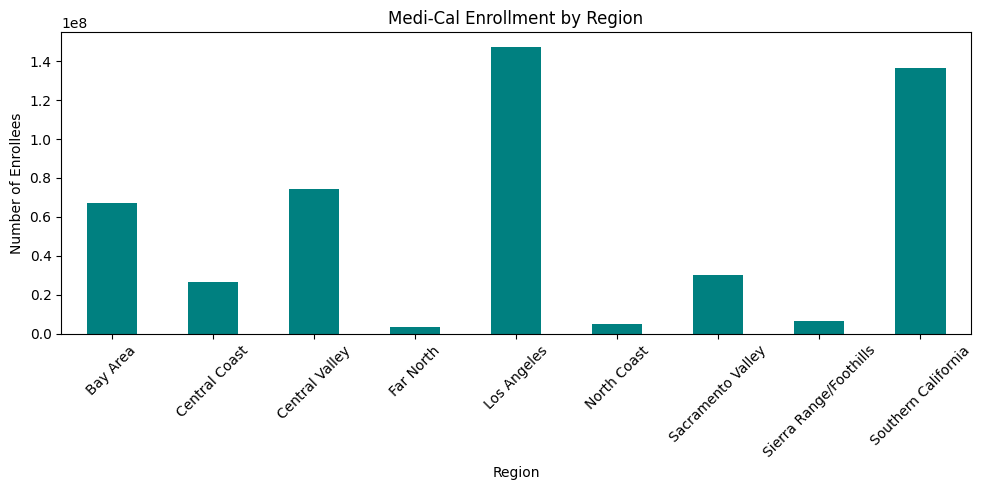

In [84]:
# Calculate the total enrollment by region
region_data = enrollment.groupby('Region')['# Enrolled'].sum()

plt.figure(figsize=(10, 5))
region_data.plot(kind='bar', color='teal')
plt.title('Medi-Cal Enrollment by Region')
plt.xlabel('Region')
plt.ylabel('Number of Enrollees')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

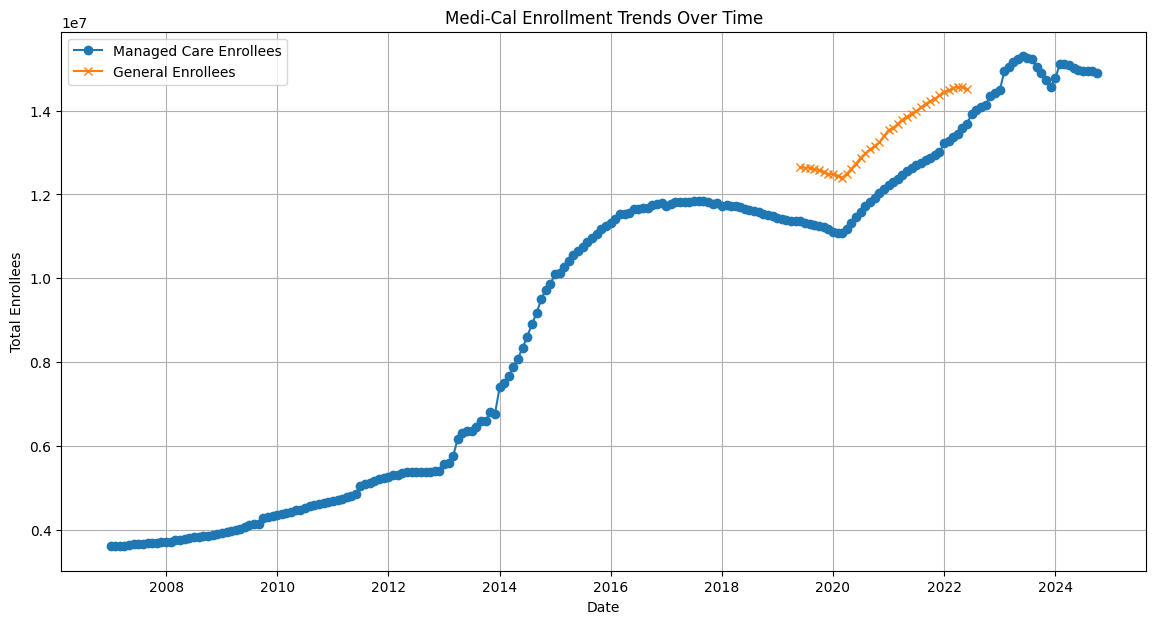

In [85]:

# Convert 'Enrollment Month' in managed_care to datetime if not yet converted and aggregate
managed_care['Enrollment Month'] = pd.to_datetime(managed_care['Enrollment Month'])
enrollment_trends_managed = managed_care.groupby(managed_care['Enrollment Month'].dt.to_period('M'))['Count of Enrollees'].sum()

# Convert 'Eligibility Date' in enrollment to datetime if not yet converted and aggregate
enrollment['Eligibility Date'] = pd.to_datetime(enrollment['Eligibility Date'])
enrollment_trends_general = enrollment.groupby(enrollment['Eligibility Date'].dt.to_period('M'))['# Enrolled'].sum()

# Convert period to datetime for plotting
enrollment_trends_managed.index = enrollment_trends_managed.index.to_timestamp()
enrollment_trends_general.index = enrollment_trends_general.index.to_timestamp()

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(enrollment_trends_managed.index, enrollment_trends_managed.values, label='Managed Care Enrollees', marker='o')
plt.plot(enrollment_trends_general.index, enrollment_trends_general.values, label='General Enrollees', marker='x')
plt.title('Medi-Cal Enrollment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Enrollees')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1400x800 with 0 Axes>

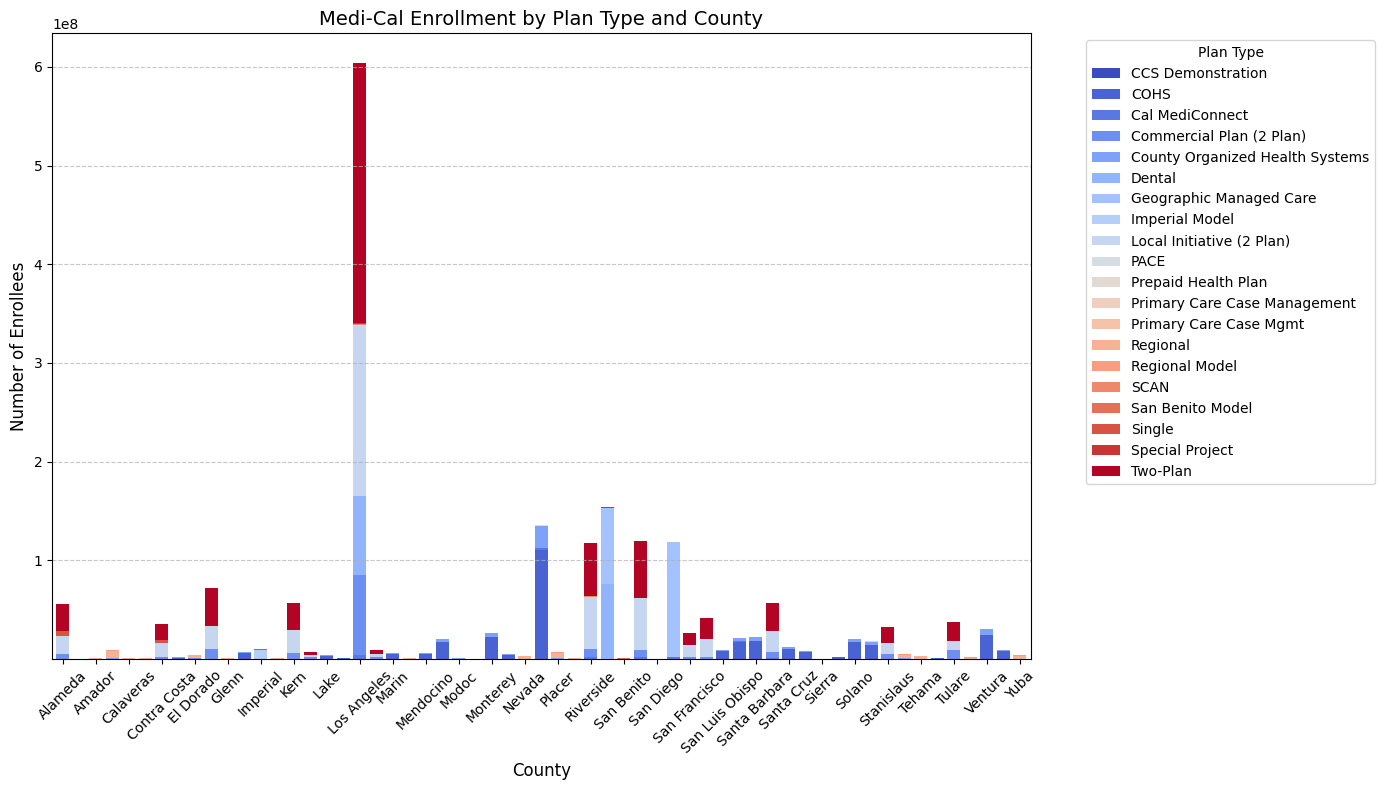

In [86]:
# Group data by County and Plan Type, and sum the counts
plan_type_data = managed_care.groupby(['County', 'Plan Type'])['Count of Enrollees'].sum().unstack().fillna(0)

# Adjust figure size
plt.figure(figsize=(14, 8))  # Adjust width and height for better proportions

# Plot the stacked bar chart
plan_type_data.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(14, 8), width=0.8)

# Add title and axis labels
plt.title('Medi-Cal Enrollment by Plan Type and County', fontsize=14)
plt.xlabel('County', fontsize=12)
plt.ylabel('Number of Enrollees', fontsize=12)

# Adjust x-axis labels to show every nth label
xticks = range(0, len(plan_type_data.index), 2)  # Show every second label
plt.xticks(xticks, plan_type_data.index[xticks], rotation=45, fontsize=10)  # Rotate and reduce font size

# Optimize legend placement
plt.legend(title='Plan Type', loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=10)

# Add gridlines for better visual guidance
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Automatically adjust layout to fit elements
plt.tight_layout()
plt.show()
